In [1]:
import math
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

In [2]:
# Cálculos
def calculos(Nrpm, Va, Ia, Ra, If):
    𝜔m = Nrpm * math.pi / 30
    Laf = (Va - Ia * Ra)/(If * 𝜔m)
    Kφ = Laf * If
    ea = Kφ * 𝜔m
    Te = Kφ * Ia

    print("𝜔m =", 𝜔m)
    print("Laf =", Laf)
    print("Kφ =", Kφ)
    print("ea =", ea)
    print("Te =", Te)

    return 𝜔m, Laf, Kφ, ea, Te

In [3]:
# Matrizes
def Matrizes(Ra, La, Kφ, J, B, Va):
    Ma = np.array(
        [
            [-Ra/La, -Kφ/La], 
            [Kφ/J, -B/J]
        ]
    )
    Mb = np.array(
        [
            [1/La],
            [0]
        ]
    )
    Mc = np.array(
        [
            [1, 0], 
            [0, 1]
        ]
    )
    Md = np.array(
        [
            [0], 
            [0]
        ]
    )

    print("A:\n", Ma)
    print("B:\n", Mb)
    print("C:\n", Mc)
    print("D:\n", Md)

    ssm = signal.StateSpace(Ma, Mb, Mc, Md)
    X = np.matmul(-np.linalg.inv(Ma), Mb)*Va

    return Ma, Mb, Mc, Md, ssm, X

In [4]:
# Simulação
def Simula(Va, ssm):
    Tt = 0.2
    Npts = 1000
    t = np.linspace(0, Tt, Npts)
    u = np.full(Npts, Va)
    [t1, y1, x1] = signal.lsim(ssm, u, t)
    ia = y1[0:Npts, 0]
    w = (30/math.pi) * y1[0:Npts,1]
    return t, ia, w

In [5]:
# Corrente de armadura x tempo
def ArmaduraTempo(t, ia):
    plt.figure(figsize=(3,3)) # tamanho da imagem
    plt.rcParams['xtick.labelsize']=12 # tamanho dos números no eixo x
    plt.rcParams['ytick.labelsize']=12 # tamanho dos números no eixo y
    plt.grid() # coloca grade

    plt.xlabel('Tempo (s)')
    plt.ylabel('Corrente de armadura, ia (A)')

    # label para eixo y, fonte, tamanho
    plt.plot(t, ia,'k',linewidth=2.0) # criar gráfico com tamanho da linha "linewidth"

    plt.show()

In [6]:
# Velocidade x tempo
def VelocidadeTempo(t, w):
    plt.figure(figsize=(3,3)) # tamanho da imagem
    plt.rcParams['xtick.labelsize']=12 # tamanho dos números no eixo x
    plt.rcParams['ytick.labelsize']=12 # tamanho dos números no eixo y
    plt.grid() # coloca grade

    plt.xlabel('Tempo (s)')
    plt.ylabel('Velocidade, Nrpm (RPM)')

    plt.plot(t, w, 'k',linewidth=2.0) # criar gráfico com tamanho da linha "linewidth"

    plt.show()

In [7]:
# Corrente de armadura, ia x velocidade, Nrpm
def CorrenteVelocidade(w, ia):
    plt.figure(figsize=(3,3)) # tamanho da imagem
    plt.rcParams['xtick.labelsize']=12 # tamanho dos números no eixo x
    plt.rcParams['ytick.labelsize']=12 # tamanho dos números no eixo y
    plt.grid() # coloca grade

    plt.xlabel('Velocidade, Nrpm (RPM)')
    plt.ylabel('Corrente de armadura, ia (A)')

    plt.plot(w, ia,'k',linewidth=2.0) # criar gráfico com tamanho da linha "linewidth"

    plt.show()

𝜔m = 25.13274122871834
Laf = 0.7241549910681239
Kφ = 0.7241549910681239
ea = 18.2
Te = 2.8966199642724955
A:
 [[-3193.83259912 -1595.05504641]
 [  482.76999405   -65.33333333]]
B:
 [[2202.64317181]
 [   0.        ]]
C:
 [[1 0]
 [0 1]]
D:
 [[0]
 [0]]


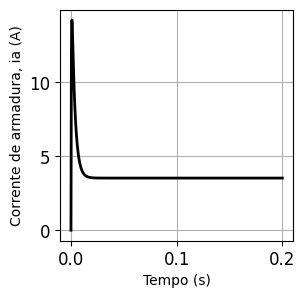

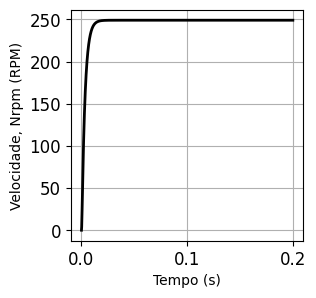

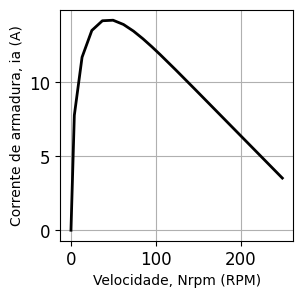

In [8]:
# Constantes
Va = 24
Ra = 1.45
La = 454 * 10**-6
Rf = 75
Lf = 2
J = 0.0015
B = 0.098
Ia = 4
If = 1
Nrpm = 240

𝜔m, Laf, Kφ, ea, Te = calculos(Nrpm, Va, Ia, Ra, If)
Ma, Mb, Mc, Md, ssm, X = Matrizes(Ra, La, Kφ, J, B, Va)
t, ia, w = Simula(Va, ssm)
ArmaduraTempo(t, ia)
VelocidadeTempo(t, w)
CorrenteVelocidade(w, ia)

In [12]:
# Controle proporcional
coeficiente = 0.3
V_alvo = 24
V_atual = 0 # começa em 0
erro = V_alvo - V_atual

# while erro > 0.95 * V_alvo:
    # saída = saída + erro * coeficiente
    # V_atual = ...
    # erro = V_alvo - V_atual